In [1]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV6
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, parse_csv, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH
import os

Using TensorFlow backend.


In [2]:
VL_sequences, VH_sequences, names_mask, animals_mask = \
    parse_csv(VH_LENGTH, VL_LENGTH,
              "../data/abysis_data_201801/abysis_data/emblig-20180125-7578.csv",
              "../data/abysis_data_201801/abysis_data/kabat-20180117-10288.csv")
# VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')
h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data]#, charge_index_data]
# DATASETS=[vdw_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

KeyboardInterrupt: 

In [ ]:
encoder, autoencoder, sess = autoencoderV6(3, latent_dim=20)

In [ ]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
NAME= 'autoencoderV6_h_data_bulkiness_data_vdw_data_param'
RUN = 'run2'

weight_path = '../model_weights/{}/{}/{}.hdf5'.format(NAME,RUN,NAME)
log_path = '../logs/{}/{}'.format(NAME, RUN)

In [ ]:
if not os.path.exists('../model_weights/{}/{}/'.format(NAME,RUN)):
    if not os.path.exists('../model_weights/{}'.format(NAME)):
        os.mkdir('../model_weights/{}'.format(NAME))
    os.mkdir('../model_weights/{}/{}'.format(NAME,RUN))

In [ ]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled],
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint(weight_path, save_best_only=True),
                                     keras.callbacks.TensorBoard(log_path)])

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

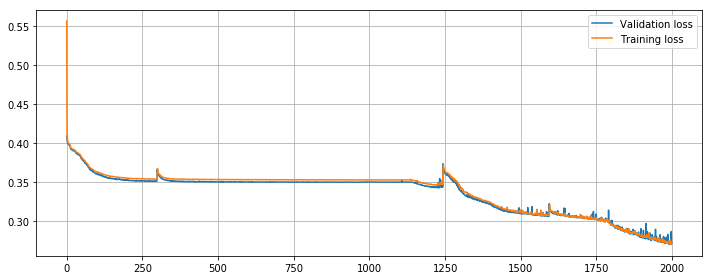

In [9]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

In [14]:
history1 = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled],
                          epochs=4000, initial_epoch=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint(weight_path, save_best_only=True),
                                     keras.callbacks.TensorBoard(log_path)])

Train on 4144 samples, validate on 1036 samples
Epoch 2001/4000
4144/4144 [==============================] - 4s 965us/step - loss: 0.2709 - VL_output_loss: 0.1381 - VH_output_loss: 0.1328 - val_loss: 0.2713 - val_VL_output_loss: 0.1359 - val_VH_output_loss: 0.1354
Epoch 2002/4000
4144/4144 [==============================] - 4s 953us/step - loss: 0.2727 - VL_output_loss: 0.1398 - VH_output_loss: 0.1329 - val_loss: 0.2717 - val_VL_output_loss: 0.1367 - val_VH_output_loss: 0.1350
Epoch 2003/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.2721 - VL_output_loss: 0.1389 - VH_output_loss: 0.1332 - val_loss: 0.2736 - val_VL_output_loss: 0.1381 - val_VH_output_loss: 0.1355
Epoch 2004/4000
4144/4144 [==============================] - 4s 990us/step - loss: 0.2737 - VL_output_loss: 0.1405 - VH_output_loss: 0.1332 - val_loss: 0.2756 - val_VL_output_loss: 0.1393 - val_VH_output_loss: 0.1363
Epoch 2005/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.273

Epoch 2076/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2651 - VL_output_loss: 0.1325 - VH_output_loss: 0.1326 - val_loss: 0.2665 - val_VL_output_loss: 0.1315 - val_VH_output_loss: 0.1350
Epoch 2077/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2664 - VL_output_loss: 0.1334 - VH_output_loss: 0.1330 - val_loss: 0.2663 - val_VL_output_loss: 0.1317 - val_VH_output_loss: 0.1346
Epoch 2078/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2663 - VL_output_loss: 0.1341 - VH_output_loss: 0.1322 - val_loss: 0.2670 - val_VL_output_loss: 0.1320 - val_VH_output_loss: 0.1350
Epoch 2079/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2659 - VL_output_loss: 0.1331 - VH_output_loss: 0.1328 - val_loss: 0.2655 - val_VL_output_loss: 0.1307 - val_VH_output_loss: 0.1348
Epoch 2080/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2651 - VL_output_loss: 0.1320 - VH_output_loss:

Epoch 2114/4000
4144/4144 [==============================] - 4s 949us/step - loss: 0.2612 - VL_output_loss: 0.1299 - VH_output_loss: 0.1313 - val_loss: 0.2647 - val_VL_output_loss: 0.1301 - val_VH_output_loss: 0.1346
Epoch 2115/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.2626 - VL_output_loss: 0.1311 - VH_output_loss: 0.1315 - val_loss: 0.2662 - val_VL_output_loss: 0.1320 - val_VH_output_loss: 0.1342
Epoch 2116/4000
4144/4144 [==============================] - 5s 1ms/step - loss: 0.2619 - VL_output_loss: 0.1305 - VH_output_loss: 0.1315 - val_loss: 0.2632 - val_VL_output_loss: 0.1289 - val_VH_output_loss: 0.1344
Epoch 2117/4000
4144/4144 [==============================] - 5s 1ms/step - loss: 0.2622 - VL_output_loss: 0.1309 - VH_output_loss: 0.1313 - val_loss: 0.2645 - val_VL_output_loss: 0.1300 - val_VH_output_loss: 0.1345
Epoch 2118/4000
4144/4144 [==============================] - 5s 1ms/step - loss: 0.2627 - VL_output_loss: 0.1312 - VH_output_loss: 0.1316 

Epoch 2152/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.2612 - VL_output_loss: 0.1296 - VH_output_loss: 0.1316 - val_loss: 0.2638 - val_VL_output_loss: 0.1297 - val_VH_output_loss: 0.1341
Epoch 2153/4000
4144/4144 [==============================] - 4s 983us/step - loss: 0.2611 - VL_output_loss: 0.1296 - VH_output_loss: 0.1315 - val_loss: 0.2638 - val_VL_output_loss: 0.1295 - val_VH_output_loss: 0.1343
Epoch 2154/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.2605 - VL_output_loss: 0.1291 - VH_output_loss: 0.1315 - val_loss: 0.2626 - val_VL_output_loss: 0.1284 - val_VH_output_loss: 0.1342
Epoch 2155/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.2619 - VL_output_loss: 0.1304 - VH_output_loss: 0.1315 - val_loss: 0.2631 - val_VL_output_loss: 0.1283 - val_VH_output_loss: 0.1348
Epoch 2156/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.2643 - VL_output_loss: 0.1303 - VH_output_loss: 0.1340 

Epoch 2190/4000
4144/4144 [==============================] - 4s 1ms/step - loss: 0.2629 - VL_output_loss: 0.1295 - VH_output_loss: 0.1334 - val_loss: 0.2609 - val_VL_output_loss: 0.1273 - val_VH_output_loss: 0.1336
Epoch 2191/4000
4144/4144 [==============================] - 5s 1ms/step - loss: 0.2605 - VL_output_loss: 0.1276 - VH_output_loss: 0.1329 - val_loss: 0.2600 - val_VL_output_loss: 0.1264 - val_VH_output_loss: 0.1336
Epoch 2192/4000
4144/4144 [==============================] - 5s 1ms/step - loss: 0.2571 - VL_output_loss: 0.1267 - VH_output_loss: 0.1303 - val_loss: 0.2598 - val_VL_output_loss: 0.1265 - val_VH_output_loss: 0.1333
Epoch 2193/4000
4144/4144 [==============================] - 4s 922us/step - loss: 0.2567 - VL_output_loss: 0.1265 - VH_output_loss: 0.1302 - val_loss: 0.2613 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1339
Epoch 2194/4000
4144/4144 [==============================] - 4s 892us/step - loss: 0.2576 - VL_output_loss: 0.1274 - VH_output_loss: 0.130

Epoch 2228/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2563 - VL_output_loss: 0.1259 - VH_output_loss: 0.1304 - val_loss: 0.2617 - val_VL_output_loss: 0.1269 - val_VH_output_loss: 0.1349
Epoch 2229/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2564 - VL_output_loss: 0.1260 - VH_output_loss: 0.1304 - val_loss: 0.2610 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1336
Epoch 2230/4000
4144/4144 [==============================] - 4s 904us/step - loss: 0.2557 - VL_output_loss: 0.1257 - VH_output_loss: 0.1300 - val_loss: 0.2598 - val_VL_output_loss: 0.1260 - val_VH_output_loss: 0.1338
Epoch 2231/4000
4144/4144 [==============================] - 4s 922us/step - loss: 0.2576 - VL_output_loss: 0.1267 - VH_output_loss: 0.1310 - val_loss: 0.2605 - val_VL_output_loss: 0.1267 - val_VH_output_loss: 0.1339
Epoch 2232/4000
4144/4144 [==============================] - 4s 905us/step - loss: 0.2768 - VL_output_loss: 0.1311 - VH_output_loss:

Epoch 2266/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2557 - VL_output_loss: 0.1252 - VH_output_loss: 0.1305 - val_loss: 0.2640 - val_VL_output_loss: 0.1291 - val_VH_output_loss: 0.1348
Epoch 2267/4000
4144/4144 [==============================] - 4s 906us/step - loss: 0.2562 - VL_output_loss: 0.1259 - VH_output_loss: 0.1304 - val_loss: 0.2601 - val_VL_output_loss: 0.1259 - val_VH_output_loss: 0.1342
Epoch 2268/4000
4144/4144 [==============================] - 4s 903us/step - loss: 0.2549 - VL_output_loss: 0.1244 - VH_output_loss: 0.1305 - val_loss: 0.2626 - val_VL_output_loss: 0.1291 - val_VH_output_loss: 0.1335
Epoch 2269/4000
4144/4144 [==============================] - 4s 945us/step - loss: 0.2565 - VL_output_loss: 0.1260 - VH_output_loss: 0.1305 - val_loss: 0.2609 - val_VL_output_loss: 0.1275 - val_VH_output_loss: 0.1334
Epoch 2270/4000
4144/4144 [==============================] - 4s 926us/step - loss: 0.2560 - VL_output_loss: 0.1251 - VH_output_loss:

Epoch 2304/4000
4144/4144 [==============================] - 4s 906us/step - loss: 0.2524 - VL_output_loss: 0.1226 - VH_output_loss: 0.1299 - val_loss: 0.2566 - val_VL_output_loss: 0.1237 - val_VH_output_loss: 0.1329
Epoch 2305/4000
4144/4144 [==============================] - 4s 932us/step - loss: 0.2537 - VL_output_loss: 0.1237 - VH_output_loss: 0.1300 - val_loss: 0.2570 - val_VL_output_loss: 0.1238 - val_VH_output_loss: 0.1331
Epoch 2306/4000
4144/4144 [==============================] - 4s 939us/step - loss: 0.2524 - VL_output_loss: 0.1223 - VH_output_loss: 0.1301 - val_loss: 0.2568 - val_VL_output_loss: 0.1240 - val_VH_output_loss: 0.1327
Epoch 2307/4000
4144/4144 [==============================] - 4s 936us/step - loss: 0.2521 - VL_output_loss: 0.1224 - VH_output_loss: 0.1296 - val_loss: 0.2572 - val_VL_output_loss: 0.1240 - val_VH_output_loss: 0.1332
Epoch 2308/4000
4144/4144 [==============================] - 4s 956us/step - loss: 0.2530 - VL_output_loss: 0.1234 - VH_output_loss:

Epoch 2342/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2502 - VL_output_loss: 0.1213 - VH_output_loss: 0.1289 - val_loss: 0.2559 - val_VL_output_loss: 0.1234 - val_VH_output_loss: 0.1325
Epoch 2343/4000
4144/4144 [==============================] - 4s 890us/step - loss: 0.2507 - VL_output_loss: 0.1216 - VH_output_loss: 0.1291 - val_loss: 0.2555 - val_VL_output_loss: 0.1224 - val_VH_output_loss: 0.1331
Epoch 2344/4000
4144/4144 [==============================] - 4s 892us/step - loss: 0.2501 - VL_output_loss: 0.1210 - VH_output_loss: 0.1292 - val_loss: 0.2559 - val_VL_output_loss: 0.1230 - val_VH_output_loss: 0.1328
Epoch 2345/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2506 - VL_output_loss: 0.1217 - VH_output_loss: 0.1290 - val_loss: 0.2674 - val_VL_output_loss: 0.1347 - val_VH_output_loss: 0.1326
Epoch 2346/4000
4144/4144 [==============================] - 4s 892us/step - loss: 0.2499 - VL_output_loss: 0.1207 - VH_output_loss:

Epoch 2380/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2552 - VL_output_loss: 0.1237 - VH_output_loss: 0.1315 - val_loss: 0.2585 - val_VL_output_loss: 0.1249 - val_VH_output_loss: 0.1335
Epoch 2381/4000
4144/4144 [==============================] - 4s 889us/step - loss: 0.2482 - VL_output_loss: 0.1195 - VH_output_loss: 0.1287 - val_loss: 0.2558 - val_VL_output_loss: 0.1237 - val_VH_output_loss: 0.1322
Epoch 2382/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2487 - VL_output_loss: 0.1202 - VH_output_loss: 0.1285 - val_loss: 0.2537 - val_VL_output_loss: 0.1213 - val_VH_output_loss: 0.1324
Epoch 2383/4000
4144/4144 [==============================] - 4s 892us/step - loss: 0.2481 - VL_output_loss: 0.1195 - VH_output_loss: 0.1286 - val_loss: 0.2591 - val_VL_output_loss: 0.1236 - val_VH_output_loss: 0.1355
Epoch 2384/4000
4144/4144 [==============================] - 4s 903us/step - loss: 0.2479 - VL_output_loss: 0.1190 - VH_output_loss:

Epoch 2418/4000
4144/4144 [==============================] - 4s 904us/step - loss: 0.2480 - VL_output_loss: 0.1195 - VH_output_loss: 0.1286 - val_loss: 0.2548 - val_VL_output_loss: 0.1227 - val_VH_output_loss: 0.1321
Epoch 2419/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2480 - VL_output_loss: 0.1187 - VH_output_loss: 0.1292 - val_loss: 0.2580 - val_VL_output_loss: 0.1254 - val_VH_output_loss: 0.1326
Epoch 2420/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2465 - VL_output_loss: 0.1180 - VH_output_loss: 0.1284 - val_loss: 0.2578 - val_VL_output_loss: 0.1252 - val_VH_output_loss: 0.1326
Epoch 2421/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2471 - VL_output_loss: 0.1185 - VH_output_loss: 0.1286 - val_loss: 0.2530 - val_VL_output_loss: 0.1203 - val_VH_output_loss: 0.1327
Epoch 2422/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2485 - VL_output_loss: 0.1190 - VH_output_loss:

Epoch 2456/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2477 - VL_output_loss: 0.1192 - VH_output_loss: 0.1285 - val_loss: 0.2524 - val_VL_output_loss: 0.1204 - val_VH_output_loss: 0.1320
Epoch 2457/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2460 - VL_output_loss: 0.1179 - VH_output_loss: 0.1282 - val_loss: 0.2515 - val_VL_output_loss: 0.1195 - val_VH_output_loss: 0.1319
Epoch 2458/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2453 - VL_output_loss: 0.1170 - VH_output_loss: 0.1283 - val_loss: 0.2516 - val_VL_output_loss: 0.1195 - val_VH_output_loss: 0.1321
Epoch 2459/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2453 - VL_output_loss: 0.1172 - VH_output_loss: 0.1281 - val_loss: 0.2518 - val_VL_output_loss: 0.1195 - val_VH_output_loss: 0.1323
Epoch 2460/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2467 - VL_output_loss: 0.1178 - VH_output_loss:

Epoch 2494/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2442 - VL_output_loss: 0.1162 - VH_output_loss: 0.1280 - val_loss: 0.2524 - val_VL_output_loss: 0.1204 - val_VH_output_loss: 0.1320
Epoch 2495/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2440 - VL_output_loss: 0.1156 - VH_output_loss: 0.1283 - val_loss: 0.2515 - val_VL_output_loss: 0.1190 - val_VH_output_loss: 0.1325
Epoch 2496/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2443 - VL_output_loss: 0.1159 - VH_output_loss: 0.1284 - val_loss: 0.2547 - val_VL_output_loss: 0.1222 - val_VH_output_loss: 0.1325
Epoch 2497/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2447 - VL_output_loss: 0.1165 - VH_output_loss: 0.1283 - val_loss: 0.2514 - val_VL_output_loss: 0.1191 - val_VH_output_loss: 0.1322
Epoch 2498/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2452 - VL_output_loss: 0.1168 - VH_output_loss:

Epoch 2532/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2422 - VL_output_loss: 0.1148 - VH_output_loss: 0.1275 - val_loss: 0.2500 - val_VL_output_loss: 0.1184 - val_VH_output_loss: 0.1317
Epoch 2533/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2443 - VL_output_loss: 0.1166 - VH_output_loss: 0.1277 - val_loss: 0.2493 - val_VL_output_loss: 0.1174 - val_VH_output_loss: 0.1319
Epoch 2534/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2447 - VL_output_loss: 0.1159 - VH_output_loss: 0.1288 - val_loss: 0.2496 - val_VL_output_loss: 0.1177 - val_VH_output_loss: 0.1319
Epoch 2535/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2414 - VL_output_loss: 0.1141 - VH_output_loss: 0.1273 - val_loss: 0.2481 - val_VL_output_loss: 0.1171 - val_VH_output_loss: 0.1310
Epoch 2536/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2419 - VL_output_loss: 0.1146 - VH_output_loss:

Epoch 2570/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2425 - VL_output_loss: 0.1150 - VH_output_loss: 0.1274 - val_loss: 0.2491 - val_VL_output_loss: 0.1168 - val_VH_output_loss: 0.1323
Epoch 2571/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2421 - VL_output_loss: 0.1144 - VH_output_loss: 0.1277 - val_loss: 0.2481 - val_VL_output_loss: 0.1165 - val_VH_output_loss: 0.1315
Epoch 2572/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2413 - VL_output_loss: 0.1140 - VH_output_loss: 0.1272 - val_loss: 0.2492 - val_VL_output_loss: 0.1177 - val_VH_output_loss: 0.1314
Epoch 2573/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2510 - VL_output_loss: 0.1216 - VH_output_loss: 0.1293 - val_loss: 0.2525 - val_VL_output_loss: 0.1201 - val_VH_output_loss: 0.1324
Epoch 2574/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2426 - VL_output_loss: 0.1153 - VH_output_loss:

Epoch 2608/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2422 - VL_output_loss: 0.1152 - VH_output_loss: 0.1270 - val_loss: 0.2473 - val_VL_output_loss: 0.1161 - val_VH_output_loss: 0.1311
Epoch 2609/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2403 - VL_output_loss: 0.1129 - VH_output_loss: 0.1273 - val_loss: 0.2471 - val_VL_output_loss: 0.1161 - val_VH_output_loss: 0.1310
Epoch 2610/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2395 - VL_output_loss: 0.1125 - VH_output_loss: 0.1269 - val_loss: 0.2512 - val_VL_output_loss: 0.1199 - val_VH_output_loss: 0.1313
Epoch 2611/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2412 - VL_output_loss: 0.1142 - VH_output_loss: 0.1270 - val_loss: 0.2510 - val_VL_output_loss: 0.1204 - val_VH_output_loss: 0.1306
Epoch 2612/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2417 - VL_output_loss: 0.1142 - VH_output_loss:

Epoch 2646/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2397 - VL_output_loss: 0.1129 - VH_output_loss: 0.1268 - val_loss: 0.2647 - val_VL_output_loss: 0.1329 - val_VH_output_loss: 0.1318
Epoch 2647/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2408 - VL_output_loss: 0.1139 - VH_output_loss: 0.1269 - val_loss: 0.2476 - val_VL_output_loss: 0.1164 - val_VH_output_loss: 0.1312
Epoch 2648/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2396 - VL_output_loss: 0.1127 - VH_output_loss: 0.1269 - val_loss: 0.2491 - val_VL_output_loss: 0.1176 - val_VH_output_loss: 0.1316
Epoch 2649/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2402 - VL_output_loss: 0.1131 - VH_output_loss: 0.1271 - val_loss: 0.2485 - val_VL_output_loss: 0.1173 - val_VH_output_loss: 0.1312
Epoch 2650/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2410 - VL_output_loss: 0.1138 - VH_output_loss:

Epoch 2684/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2395 - VL_output_loss: 0.1124 - VH_output_loss: 0.1271 - val_loss: 0.2496 - val_VL_output_loss: 0.1185 - val_VH_output_loss: 0.1311
Epoch 2685/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2418 - VL_output_loss: 0.1144 - VH_output_loss: 0.1274 - val_loss: 0.2491 - val_VL_output_loss: 0.1174 - val_VH_output_loss: 0.1317
Epoch 2686/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2380 - VL_output_loss: 0.1115 - VH_output_loss: 0.1265 - val_loss: 0.2463 - val_VL_output_loss: 0.1156 - val_VH_output_loss: 0.1307
Epoch 2687/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2388 - VL_output_loss: 0.1119 - VH_output_loss: 0.1268 - val_loss: 0.2474 - val_VL_output_loss: 0.1163 - val_VH_output_loss: 0.1311
Epoch 2688/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2385 - VL_output_loss: 0.1118 - VH_output_loss:

Epoch 2722/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2362 - VL_output_loss: 0.1102 - VH_output_loss: 0.1259 - val_loss: 0.2454 - val_VL_output_loss: 0.1147 - val_VH_output_loss: 0.1307
Epoch 2723/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2366 - VL_output_loss: 0.1109 - VH_output_loss: 0.1256 - val_loss: 0.2466 - val_VL_output_loss: 0.1158 - val_VH_output_loss: 0.1307
Epoch 2724/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2372 - VL_output_loss: 0.1109 - VH_output_loss: 0.1263 - val_loss: 0.2467 - val_VL_output_loss: 0.1157 - val_VH_output_loss: 0.1310
Epoch 2725/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2379 - VL_output_loss: 0.1114 - VH_output_loss: 0.1265 - val_loss: 0.2445 - val_VL_output_loss: 0.1141 - val_VH_output_loss: 0.1304
Epoch 2726/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2393 - VL_output_loss: 0.1129 - VH_output_loss:

Epoch 2760/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2356 - VL_output_loss: 0.1101 - VH_output_loss: 0.1255 - val_loss: 0.2461 - val_VL_output_loss: 0.1159 - val_VH_output_loss: 0.1302
Epoch 2761/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2366 - VL_output_loss: 0.1102 - VH_output_loss: 0.1264 - val_loss: 0.2474 - val_VL_output_loss: 0.1157 - val_VH_output_loss: 0.1317
Epoch 2762/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2360 - VL_output_loss: 0.1102 - VH_output_loss: 0.1258 - val_loss: 0.2438 - val_VL_output_loss: 0.1132 - val_VH_output_loss: 0.1307
Epoch 2763/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2349 - VL_output_loss: 0.1090 - VH_output_loss: 0.1259 - val_loss: 0.2435 - val_VL_output_loss: 0.1134 - val_VH_output_loss: 0.1301
Epoch 2764/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2364 - VL_output_loss: 0.1109 - VH_output_loss:

Epoch 2798/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2362 - VL_output_loss: 0.1106 - VH_output_loss: 0.1255 - val_loss: 0.2487 - val_VL_output_loss: 0.1147 - val_VH_output_loss: 0.1340
Epoch 2799/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2443 - VL_output_loss: 0.1115 - VH_output_loss: 0.1327 - val_loss: 0.2466 - val_VL_output_loss: 0.1133 - val_VH_output_loss: 0.1333
Epoch 2800/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2403 - VL_output_loss: 0.1116 - VH_output_loss: 0.1288 - val_loss: 0.2441 - val_VL_output_loss: 0.1129 - val_VH_output_loss: 0.1311
Epoch 2801/4000
4144/4144 [==============================] - 4s 890us/step - loss: 0.2349 - VL_output_loss: 0.1086 - VH_output_loss: 0.1263 - val_loss: 0.2427 - val_VL_output_loss: 0.1124 - val_VH_output_loss: 0.1303
Epoch 2802/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2348 - VL_output_loss: 0.1095 - VH_output_loss:

Epoch 2836/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2339 - VL_output_loss: 0.1087 - VH_output_loss: 0.1252 - val_loss: 0.2431 - val_VL_output_loss: 0.1131 - val_VH_output_loss: 0.1300
Epoch 2837/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2339 - VL_output_loss: 0.1090 - VH_output_loss: 0.1249 - val_loss: 0.2415 - val_VL_output_loss: 0.1119 - val_VH_output_loss: 0.1296
Epoch 2838/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2342 - VL_output_loss: 0.1091 - VH_output_loss: 0.1251 - val_loss: 0.2444 - val_VL_output_loss: 0.1147 - val_VH_output_loss: 0.1297
Epoch 2839/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2326 - VL_output_loss: 0.1076 - VH_output_loss: 0.1250 - val_loss: 0.2418 - val_VL_output_loss: 0.1118 - val_VH_output_loss: 0.1301
Epoch 2840/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2332 - VL_output_loss: 0.1079 - VH_output_loss:

Epoch 2874/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2316 - VL_output_loss: 0.1072 - VH_output_loss: 0.1245 - val_loss: 0.2420 - val_VL_output_loss: 0.1120 - val_VH_output_loss: 0.1300
Epoch 2875/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2318 - VL_output_loss: 0.1075 - VH_output_loss: 0.1244 - val_loss: 0.2409 - val_VL_output_loss: 0.1114 - val_VH_output_loss: 0.1296
Epoch 2876/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2311 - VL_output_loss: 0.1069 - VH_output_loss: 0.1243 - val_loss: 0.2422 - val_VL_output_loss: 0.1124 - val_VH_output_loss: 0.1298
Epoch 2877/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2314 - VL_output_loss: 0.1070 - VH_output_loss: 0.1245 - val_loss: 0.2417 - val_VL_output_loss: 0.1115 - val_VH_output_loss: 0.1301
Epoch 2878/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2312 - VL_output_loss: 0.1067 - VH_output_loss:

Epoch 2912/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2330 - VL_output_loss: 0.1075 - VH_output_loss: 0.1255 - val_loss: 0.2429 - val_VL_output_loss: 0.1125 - val_VH_output_loss: 0.1304
Epoch 2913/4000
4144/4144 [==============================] - 4s 892us/step - loss: 0.2322 - VL_output_loss: 0.1070 - VH_output_loss: 0.1252 - val_loss: 0.2421 - val_VL_output_loss: 0.1120 - val_VH_output_loss: 0.1301
Epoch 2914/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2316 - VL_output_loss: 0.1067 - VH_output_loss: 0.1249 - val_loss: 0.2422 - val_VL_output_loss: 0.1120 - val_VH_output_loss: 0.1302
Epoch 2915/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2313 - VL_output_loss: 0.1066 - VH_output_loss: 0.1247 - val_loss: 0.2425 - val_VL_output_loss: 0.1125 - val_VH_output_loss: 0.1300
Epoch 2916/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2314 - VL_output_loss: 0.1068 - VH_output_loss:

Epoch 2950/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2308 - VL_output_loss: 0.1069 - VH_output_loss: 0.1238 - val_loss: 0.2420 - val_VL_output_loss: 0.1121 - val_VH_output_loss: 0.1299
Epoch 2951/4000
4144/4144 [==============================] - 4s 891us/step - loss: 0.2320 - VL_output_loss: 0.1078 - VH_output_loss: 0.1242 - val_loss: 0.2428 - val_VL_output_loss: 0.1123 - val_VH_output_loss: 0.1304
Epoch 2952/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2317 - VL_output_loss: 0.1072 - VH_output_loss: 0.1245 - val_loss: 0.2413 - val_VL_output_loss: 0.1112 - val_VH_output_loss: 0.1301
Epoch 2953/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2338 - VL_output_loss: 0.1087 - VH_output_loss: 0.1251 - val_loss: 0.2498 - val_VL_output_loss: 0.1202 - val_VH_output_loss: 0.1297
Epoch 2954/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2328 - VL_output_loss: 0.1080 - VH_output_loss:

Epoch 2988/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2323 - VL_output_loss: 0.1071 - VH_output_loss: 0.1252 - val_loss: 0.2427 - val_VL_output_loss: 0.1125 - val_VH_output_loss: 0.1301
Epoch 2989/4000
4144/4144 [==============================] - 4s 889us/step - loss: 0.2306 - VL_output_loss: 0.1063 - VH_output_loss: 0.1244 - val_loss: 0.2430 - val_VL_output_loss: 0.1133 - val_VH_output_loss: 0.1297
Epoch 2990/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2309 - VL_output_loss: 0.1064 - VH_output_loss: 0.1244 - val_loss: 0.2430 - val_VL_output_loss: 0.1129 - val_VH_output_loss: 0.1301
Epoch 2991/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.2303 - VL_output_loss: 0.1059 - VH_output_loss: 0.1245 - val_loss: 0.2423 - val_VL_output_loss: 0.1120 - val_VH_output_loss: 0.1303
Epoch 2992/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2315 - VL_output_loss: 0.1062 - VH_output_loss:

Epoch 3026/4000
4144/4144 [==============================] - 4s 892us/step - loss: 0.2546 - VL_output_loss: 0.1163 - VH_output_loss: 0.1383 - val_loss: 0.2481 - val_VL_output_loss: 0.1114 - val_VH_output_loss: 0.1367
Epoch 3027/4000
4144/4144 [==============================] - 4s 890us/step - loss: 0.2424 - VL_output_loss: 0.1081 - VH_output_loss: 0.1343 - val_loss: 0.2454 - val_VL_output_loss: 0.1105 - val_VH_output_loss: 0.1349
Epoch 3028/4000
4144/4144 [==============================] - 4s 902us/step - loss: 0.2392 - VL_output_loss: 0.1063 - VH_output_loss: 0.1329 - val_loss: 0.2441 - val_VL_output_loss: 0.1100 - val_VH_output_loss: 0.1340
Epoch 3029/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2378 - VL_output_loss: 0.1057 - VH_output_loss: 0.1321 - val_loss: 0.2447 - val_VL_output_loss: 0.1111 - val_VH_output_loss: 0.1336
Epoch 3030/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2394 - VL_output_loss: 0.1068 - VH_output_loss:

Epoch 3064/4000
4144/4144 [==============================] - 4s 902us/step - loss: 0.2340 - VL_output_loss: 0.1070 - VH_output_loss: 0.1270 - val_loss: 0.2421 - val_VL_output_loss: 0.1107 - val_VH_output_loss: 0.1314
Epoch 3065/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2332 - VL_output_loss: 0.1061 - VH_output_loss: 0.1271 - val_loss: 0.2397 - val_VL_output_loss: 0.1087 - val_VH_output_loss: 0.1310
Epoch 3066/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2329 - VL_output_loss: 0.1058 - VH_output_loss: 0.1270 - val_loss: 0.2416 - val_VL_output_loss: 0.1092 - val_VH_output_loss: 0.1324
Epoch 3067/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2337 - VL_output_loss: 0.1062 - VH_output_loss: 0.1275 - val_loss: 0.2418 - val_VL_output_loss: 0.1100 - val_VH_output_loss: 0.1318
Epoch 3068/4000
4144/4144 [==============================] - 4s 907us/step - loss: 0.2363 - VL_output_loss: 0.1083 - VH_output_loss:

Epoch 3102/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2300 - VL_output_loss: 0.1041 - VH_output_loss: 0.1259 - val_loss: 0.2400 - val_VL_output_loss: 0.1098 - val_VH_output_loss: 0.1302
Epoch 3103/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2310 - VL_output_loss: 0.1047 - VH_output_loss: 0.1263 - val_loss: 0.2384 - val_VL_output_loss: 0.1080 - val_VH_output_loss: 0.1303
Epoch 3104/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2310 - VL_output_loss: 0.1048 - VH_output_loss: 0.1262 - val_loss: 0.2406 - val_VL_output_loss: 0.1096 - val_VH_output_loss: 0.1310
Epoch 3105/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2328 - VL_output_loss: 0.1061 - VH_output_loss: 0.1267 - val_loss: 0.2393 - val_VL_output_loss: 0.1085 - val_VH_output_loss: 0.1308
Epoch 3106/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2310 - VL_output_loss: 0.1043 - VH_output_loss:

Epoch 3140/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2289 - VL_output_loss: 0.1030 - VH_output_loss: 0.1259 - val_loss: 0.2386 - val_VL_output_loss: 0.1075 - val_VH_output_loss: 0.1311
Epoch 3141/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2293 - VL_output_loss: 0.1026 - VH_output_loss: 0.1267 - val_loss: 0.2388 - val_VL_output_loss: 0.1081 - val_VH_output_loss: 0.1307
Epoch 3142/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2294 - VL_output_loss: 0.1030 - VH_output_loss: 0.1265 - val_loss: 0.2388 - val_VL_output_loss: 0.1083 - val_VH_output_loss: 0.1305
Epoch 3143/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2285 - VL_output_loss: 0.1026 - VH_output_loss: 0.1259 - val_loss: 0.2382 - val_VL_output_loss: 0.1079 - val_VH_output_loss: 0.1304
Epoch 3144/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2285 - VL_output_loss: 0.1029 - VH_output_loss:

Epoch 3178/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2272 - VL_output_loss: 0.1018 - VH_output_loss: 0.1254 - val_loss: 0.2369 - val_VL_output_loss: 0.1064 - val_VH_output_loss: 0.1305
Epoch 3179/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2278 - VL_output_loss: 0.1024 - VH_output_loss: 0.1254 - val_loss: 0.2379 - val_VL_output_loss: 0.1071 - val_VH_output_loss: 0.1308
Epoch 3180/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2380 - VL_output_loss: 0.1098 - VH_output_loss: 0.1282 - val_loss: 0.2417 - val_VL_output_loss: 0.1109 - val_VH_output_loss: 0.1309
Epoch 3181/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2311 - VL_output_loss: 0.1051 - VH_output_loss: 0.1260 - val_loss: 0.2408 - val_VL_output_loss: 0.1105 - val_VH_output_loss: 0.1303
Epoch 3182/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2274 - VL_output_loss: 0.1024 - VH_output_loss:

Epoch 3216/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2299 - VL_output_loss: 0.1039 - VH_output_loss: 0.1260 - val_loss: 0.2398 - val_VL_output_loss: 0.1087 - val_VH_output_loss: 0.1311
Epoch 3217/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2293 - VL_output_loss: 0.1033 - VH_output_loss: 0.1260 - val_loss: 0.2389 - val_VL_output_loss: 0.1080 - val_VH_output_loss: 0.1309
Epoch 3218/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2290 - VL_output_loss: 0.1032 - VH_output_loss: 0.1258 - val_loss: 0.2381 - val_VL_output_loss: 0.1077 - val_VH_output_loss: 0.1304
Epoch 3219/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2284 - VL_output_loss: 0.1026 - VH_output_loss: 0.1257 - val_loss: 0.2377 - val_VL_output_loss: 0.1075 - val_VH_output_loss: 0.1302
Epoch 3220/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2285 - VL_output_loss: 0.1028 - VH_output_loss:

Epoch 3254/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2346 - VL_output_loss: 0.1084 - VH_output_loss: 0.1262 - val_loss: 0.2438 - val_VL_output_loss: 0.1121 - val_VH_output_loss: 0.1317
Epoch 3255/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2341 - VL_output_loss: 0.1078 - VH_output_loss: 0.1263 - val_loss: 0.2425 - val_VL_output_loss: 0.1114 - val_VH_output_loss: 0.1311
Epoch 3256/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2331 - VL_output_loss: 0.1071 - VH_output_loss: 0.1260 - val_loss: 0.2424 - val_VL_output_loss: 0.1111 - val_VH_output_loss: 0.1313
Epoch 3257/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2327 - VL_output_loss: 0.1066 - VH_output_loss: 0.1261 - val_loss: 0.2420 - val_VL_output_loss: 0.1107 - val_VH_output_loss: 0.1313
Epoch 3258/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2321 - VL_output_loss: 0.1060 - VH_output_loss:

Epoch 3292/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2247 - VL_output_loss: 0.1004 - VH_output_loss: 0.1243 - val_loss: 0.2358 - val_VL_output_loss: 0.1060 - val_VH_output_loss: 0.1298
Epoch 3293/4000
4144/4144 [==============================] - 4s 876us/step - loss: 0.2258 - VL_output_loss: 0.1010 - VH_output_loss: 0.1248 - val_loss: 0.2376 - val_VL_output_loss: 0.1071 - val_VH_output_loss: 0.1306
Epoch 3294/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2271 - VL_output_loss: 0.1022 - VH_output_loss: 0.1248 - val_loss: 0.2453 - val_VL_output_loss: 0.1156 - val_VH_output_loss: 0.1298
Epoch 3295/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2309 - VL_output_loss: 0.1050 - VH_output_loss: 0.1259 - val_loss: 0.2474 - val_VL_output_loss: 0.1136 - val_VH_output_loss: 0.1338
Epoch 3296/4000
4144/4144 [==============================] - 4s 904us/step - loss: 0.2295 - VL_output_loss: 0.1039 - VH_output_loss:

Epoch 3330/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2280 - VL_output_loss: 0.1016 - VH_output_loss: 0.1264 - val_loss: 0.2374 - val_VL_output_loss: 0.1069 - val_VH_output_loss: 0.1305
Epoch 3331/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2283 - VL_output_loss: 0.1015 - VH_output_loss: 0.1268 - val_loss: 0.2377 - val_VL_output_loss: 0.1069 - val_VH_output_loss: 0.1308
Epoch 3332/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2270 - VL_output_loss: 0.1012 - VH_output_loss: 0.1258 - val_loss: 0.2379 - val_VL_output_loss: 0.1075 - val_VH_output_loss: 0.1304
Epoch 3333/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2264 - VL_output_loss: 0.1009 - VH_output_loss: 0.1255 - val_loss: 0.2373 - val_VL_output_loss: 0.1068 - val_VH_output_loss: 0.1305
Epoch 3334/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2262 - VL_output_loss: 0.1010 - VH_output_loss:

Epoch 3368/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2232 - VL_output_loss: 0.0995 - VH_output_loss: 0.1237 - val_loss: 0.2365 - val_VL_output_loss: 0.1055 - val_VH_output_loss: 0.1310
Epoch 3369/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2249 - VL_output_loss: 0.1007 - VH_output_loss: 0.1242 - val_loss: 0.2348 - val_VL_output_loss: 0.1056 - val_VH_output_loss: 0.1292
Epoch 3370/4000
4144/4144 [==============================] - 4s 904us/step - loss: 0.2241 - VL_output_loss: 0.1003 - VH_output_loss: 0.1239 - val_loss: 0.2370 - val_VL_output_loss: 0.1071 - val_VH_output_loss: 0.1299
Epoch 3371/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2260 - VL_output_loss: 0.1019 - VH_output_loss: 0.1241 - val_loss: 0.2356 - val_VL_output_loss: 0.1056 - val_VH_output_loss: 0.1299
Epoch 3372/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2247 - VL_output_loss: 0.0998 - VH_output_loss:

Epoch 3406/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2232 - VL_output_loss: 0.0999 - VH_output_loss: 0.1234 - val_loss: 0.2349 - val_VL_output_loss: 0.1055 - val_VH_output_loss: 0.1294
Epoch 3407/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2245 - VL_output_loss: 0.1008 - VH_output_loss: 0.1237 - val_loss: 0.2352 - val_VL_output_loss: 0.1055 - val_VH_output_loss: 0.1297
Epoch 3408/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2253 - VL_output_loss: 0.1009 - VH_output_loss: 0.1243 - val_loss: 0.2353 - val_VL_output_loss: 0.1061 - val_VH_output_loss: 0.1293
Epoch 3409/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2246 - VL_output_loss: 0.1006 - VH_output_loss: 0.1240 - val_loss: 0.2394 - val_VL_output_loss: 0.1091 - val_VH_output_loss: 0.1303
Epoch 3410/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2251 - VL_output_loss: 0.1014 - VH_output_loss:

Epoch 3444/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2246 - VL_output_loss: 0.1007 - VH_output_loss: 0.1239 - val_loss: 0.2367 - val_VL_output_loss: 0.1058 - val_VH_output_loss: 0.1309
Epoch 3445/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2284 - VL_output_loss: 0.1033 - VH_output_loss: 0.1251 - val_loss: 0.2357 - val_VL_output_loss: 0.1058 - val_VH_output_loss: 0.1299
Epoch 3446/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2245 - VL_output_loss: 0.1006 - VH_output_loss: 0.1240 - val_loss: 0.2346 - val_VL_output_loss: 0.1051 - val_VH_output_loss: 0.1295
Epoch 3447/4000
4144/4144 [==============================] - 4s 903us/step - loss: 0.2249 - VL_output_loss: 0.1007 - VH_output_loss: 0.1242 - val_loss: 0.2382 - val_VL_output_loss: 0.1059 - val_VH_output_loss: 0.1323
Epoch 3448/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2290 - VL_output_loss: 0.1031 - VH_output_loss:

Epoch 3482/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2220 - VL_output_loss: 0.0987 - VH_output_loss: 0.1233 - val_loss: 0.2339 - val_VL_output_loss: 0.1048 - val_VH_output_loss: 0.1291
Epoch 3483/4000
4144/4144 [==============================] - 4s 906us/step - loss: 0.2236 - VL_output_loss: 0.0999 - VH_output_loss: 0.1237 - val_loss: 0.2341 - val_VL_output_loss: 0.1043 - val_VH_output_loss: 0.1298
Epoch 3484/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2233 - VL_output_loss: 0.0994 - VH_output_loss: 0.1239 - val_loss: 0.2361 - val_VL_output_loss: 0.1068 - val_VH_output_loss: 0.1293
Epoch 3485/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2260 - VL_output_loss: 0.1011 - VH_output_loss: 0.1249 - val_loss: 0.2364 - val_VL_output_loss: 0.1053 - val_VH_output_loss: 0.1311
Epoch 3486/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2341 - VL_output_loss: 0.1021 - VH_output_loss:

Epoch 3520/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2265 - VL_output_loss: 0.1030 - VH_output_loss: 0.1235 - val_loss: 0.2341 - val_VL_output_loss: 0.1055 - val_VH_output_loss: 0.1287
Epoch 3521/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.2219 - VL_output_loss: 0.0989 - VH_output_loss: 0.1230 - val_loss: 0.2335 - val_VL_output_loss: 0.1041 - val_VH_output_loss: 0.1294
Epoch 3522/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2221 - VL_output_loss: 0.0991 - VH_output_loss: 0.1230 - val_loss: 0.2334 - val_VL_output_loss: 0.1047 - val_VH_output_loss: 0.1287
Epoch 3523/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2301 - VL_output_loss: 0.1062 - VH_output_loss: 0.1239 - val_loss: 0.2395 - val_VL_output_loss: 0.1102 - val_VH_output_loss: 0.1293
Epoch 3524/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2220 - VL_output_loss: 0.0990 - VH_output_loss:

Epoch 3558/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2268 - VL_output_loss: 0.1032 - VH_output_loss: 0.1236 - val_loss: 0.2347 - val_VL_output_loss: 0.1063 - val_VH_output_loss: 0.1284
Epoch 3559/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2229 - VL_output_loss: 0.0995 - VH_output_loss: 0.1235 - val_loss: 0.2349 - val_VL_output_loss: 0.1057 - val_VH_output_loss: 0.1292
Epoch 3560/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2230 - VL_output_loss: 0.0997 - VH_output_loss: 0.1234 - val_loss: 0.2336 - val_VL_output_loss: 0.1036 - val_VH_output_loss: 0.1299
Epoch 3561/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2230 - VL_output_loss: 0.0991 - VH_output_loss: 0.1239 - val_loss: 0.2356 - val_VL_output_loss: 0.1041 - val_VH_output_loss: 0.1315
Epoch 3562/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2238 - VL_output_loss: 0.1000 - VH_output_loss:

Epoch 3596/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2239 - VL_output_loss: 0.1006 - VH_output_loss: 0.1233 - val_loss: 0.2354 - val_VL_output_loss: 0.1066 - val_VH_output_loss: 0.1288
Epoch 3597/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2216 - VL_output_loss: 0.0985 - VH_output_loss: 0.1231 - val_loss: 0.2364 - val_VL_output_loss: 0.1072 - val_VH_output_loss: 0.1292
Epoch 3598/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2226 - VL_output_loss: 0.0996 - VH_output_loss: 0.1230 - val_loss: 0.2327 - val_VL_output_loss: 0.1035 - val_VH_output_loss: 0.1292
Epoch 3599/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2243 - VL_output_loss: 0.1011 - VH_output_loss: 0.1231 - val_loss: 0.2346 - val_VL_output_loss: 0.1057 - val_VH_output_loss: 0.1289
Epoch 3600/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.2219 - VL_output_loss: 0.0991 - VH_output_loss:

Epoch 3634/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2202 - VL_output_loss: 0.0981 - VH_output_loss: 0.1220 - val_loss: 0.2318 - val_VL_output_loss: 0.1036 - val_VH_output_loss: 0.1282
Epoch 3635/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2196 - VL_output_loss: 0.0973 - VH_output_loss: 0.1223 - val_loss: 0.2335 - val_VL_output_loss: 0.1054 - val_VH_output_loss: 0.1281
Epoch 3636/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2197 - VL_output_loss: 0.0976 - VH_output_loss: 0.1221 - val_loss: 0.2315 - val_VL_output_loss: 0.1033 - val_VH_output_loss: 0.1282
Epoch 3637/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2192 - VL_output_loss: 0.0972 - VH_output_loss: 0.1219 - val_loss: 0.2361 - val_VL_output_loss: 0.1078 - val_VH_output_loss: 0.1283
Epoch 3638/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2208 - VL_output_loss: 0.0982 - VH_output_loss:

Epoch 3672/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2173 - VL_output_loss: 0.0961 - VH_output_loss: 0.1212 - val_loss: 0.2309 - val_VL_output_loss: 0.1026 - val_VH_output_loss: 0.1283
Epoch 3673/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2178 - VL_output_loss: 0.0964 - VH_output_loss: 0.1214 - val_loss: 0.2317 - val_VL_output_loss: 0.1039 - val_VH_output_loss: 0.1278
Epoch 3674/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2186 - VL_output_loss: 0.0972 - VH_output_loss: 0.1214 - val_loss: 0.2311 - val_VL_output_loss: 0.1029 - val_VH_output_loss: 0.1281
Epoch 3675/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2183 - VL_output_loss: 0.0967 - VH_output_loss: 0.1216 - val_loss: 0.2312 - val_VL_output_loss: 0.1027 - val_VH_output_loss: 0.1284
Epoch 3676/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2194 - VL_output_loss: 0.0972 - VH_output_loss:

Epoch 3710/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2193 - VL_output_loss: 0.0975 - VH_output_loss: 0.1218 - val_loss: 0.2319 - val_VL_output_loss: 0.1038 - val_VH_output_loss: 0.1281
Epoch 3711/4000
4144/4144 [==============================] - 4s 891us/step - loss: 0.2188 - VL_output_loss: 0.0970 - VH_output_loss: 0.1218 - val_loss: 0.2298 - val_VL_output_loss: 0.1020 - val_VH_output_loss: 0.1279
Epoch 3712/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2193 - VL_output_loss: 0.0973 - VH_output_loss: 0.1221 - val_loss: 0.2305 - val_VL_output_loss: 0.1022 - val_VH_output_loss: 0.1283
Epoch 3713/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.2210 - VL_output_loss: 0.0980 - VH_output_loss: 0.1230 - val_loss: 0.2310 - val_VL_output_loss: 0.1024 - val_VH_output_loss: 0.1285
Epoch 3714/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2178 - VL_output_loss: 0.0959 - VH_output_loss:

Epoch 3748/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.2532 - VL_output_loss: 0.1246 - VH_output_loss: 0.1286 - val_loss: 0.2597 - val_VL_output_loss: 0.1276 - val_VH_output_loss: 0.1320
Epoch 3749/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2522 - VL_output_loss: 0.1240 - VH_output_loss: 0.1282 - val_loss: 0.2592 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1317
Epoch 3750/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2574 - VL_output_loss: 0.1282 - VH_output_loss: 0.1292 - val_loss: 0.2648 - val_VL_output_loss: 0.1323 - val_VH_output_loss: 0.1325
Epoch 3751/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2612 - VL_output_loss: 0.1307 - VH_output_loss: 0.1305 - val_loss: 0.2742 - val_VL_output_loss: 0.1366 - val_VH_output_loss: 0.1376
Epoch 3752/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2724 - VL_output_loss: 0.1398 - VH_output_loss:

Epoch 3786/4000
4144/4144 [==============================] - 4s 893us/step - loss: 0.3370 - VL_output_loss: 0.1938 - VH_output_loss: 0.1433 - val_loss: 0.3402 - val_VL_output_loss: 0.1942 - val_VH_output_loss: 0.1459
Epoch 3787/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.3420 - VL_output_loss: 0.1929 - VH_output_loss: 0.1490 - val_loss: 0.3478 - val_VL_output_loss: 0.1923 - val_VH_output_loss: 0.1555
Epoch 3788/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.3363 - VL_output_loss: 0.1860 - VH_output_loss: 0.1502 - val_loss: 0.3304 - val_VL_output_loss: 0.1827 - val_VH_output_loss: 0.1478
Epoch 3789/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.3280 - VL_output_loss: 0.1817 - VH_output_loss: 0.1463 - val_loss: 0.3268 - val_VL_output_loss: 0.1804 - val_VH_output_loss: 0.1464
Epoch 3790/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.3251 - VL_output_loss: 0.1798 - VH_output_loss:

Epoch 3824/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.3510 - VL_output_loss: 0.1914 - VH_output_loss: 0.1596 - val_loss: 0.3497 - val_VL_output_loss: 0.1913 - val_VH_output_loss: 0.1584
Epoch 3825/4000
4144/4144 [==============================] - 4s 900us/step - loss: 0.3498 - VL_output_loss: 0.1916 - VH_output_loss: 0.1582 - val_loss: 0.3485 - val_VL_output_loss: 0.1912 - val_VH_output_loss: 0.1572
Epoch 3826/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.3498 - VL_output_loss: 0.1915 - VH_output_loss: 0.1583 - val_loss: 0.3481 - val_VL_output_loss: 0.1909 - val_VH_output_loss: 0.1571
Epoch 3827/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.3486 - VL_output_loss: 0.1911 - VH_output_loss: 0.1575 - val_loss: 0.3519 - val_VL_output_loss: 0.1910 - val_VH_output_loss: 0.1609
Epoch 3828/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.3496 - VL_output_loss: 0.1910 - VH_output_loss:

Epoch 3862/4000
4144/4144 [==============================] - 4s 898us/step - loss: 0.3552 - VL_output_loss: 0.1886 - VH_output_loss: 0.1666 - val_loss: 0.3527 - val_VL_output_loss: 0.1884 - val_VH_output_loss: 0.1643
Epoch 3863/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.3549 - VL_output_loss: 0.1885 - VH_output_loss: 0.1664 - val_loss: 0.3524 - val_VL_output_loss: 0.1883 - val_VH_output_loss: 0.1641
Epoch 3864/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.3545 - VL_output_loss: 0.1884 - VH_output_loss: 0.1661 - val_loss: 0.3516 - val_VL_output_loss: 0.1881 - val_VH_output_loss: 0.1636
Epoch 3865/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.3536 - VL_output_loss: 0.1881 - VH_output_loss: 0.1655 - val_loss: 0.3511 - val_VL_output_loss: 0.1879 - val_VH_output_loss: 0.1632
Epoch 3866/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.3529 - VL_output_loss: 0.1879 - VH_output_loss:

Epoch 3900/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.3252 - VL_output_loss: 0.1832 - VH_output_loss: 0.1420 - val_loss: 0.3230 - val_VL_output_loss: 0.1810 - val_VH_output_loss: 0.1420
Epoch 3901/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.3191 - VL_output_loss: 0.1792 - VH_output_loss: 0.1400 - val_loss: 0.3167 - val_VL_output_loss: 0.1752 - val_VH_output_loss: 0.1415
Epoch 3902/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.3155 - VL_output_loss: 0.1757 - VH_output_loss: 0.1399 - val_loss: 0.3159 - val_VL_output_loss: 0.1746 - val_VH_output_loss: 0.1413
Epoch 3903/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.3136 - VL_output_loss: 0.1744 - VH_output_loss: 0.1393 - val_loss: 0.3136 - val_VL_output_loss: 0.1735 - val_VH_output_loss: 0.1401
Epoch 3904/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.3115 - VL_output_loss: 0.1728 - VH_output_loss:

Epoch 3938/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.3046 - VL_output_loss: 0.1651 - VH_output_loss: 0.1395 - val_loss: 0.3047 - val_VL_output_loss: 0.1639 - val_VH_output_loss: 0.1408
Epoch 3939/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.3077 - VL_output_loss: 0.1670 - VH_output_loss: 0.1407 - val_loss: 0.3081 - val_VL_output_loss: 0.1659 - val_VH_output_loss: 0.1422
Epoch 3940/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.3059 - VL_output_loss: 0.1669 - VH_output_loss: 0.1390 - val_loss: 0.3030 - val_VL_output_loss: 0.1629 - val_VH_output_loss: 0.1401
Epoch 3941/4000
4144/4144 [==============================] - 4s 894us/step - loss: 0.3060 - VL_output_loss: 0.1641 - VH_output_loss: 0.1419 - val_loss: 0.3069 - val_VL_output_loss: 0.1630 - val_VH_output_loss: 0.1439
Epoch 3942/4000
4144/4144 [==============================] - 4s 901us/step - loss: 0.3090 - VL_output_loss: 0.1669 - VH_output_loss:

Epoch 3976/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2920 - VL_output_loss: 0.1586 - VH_output_loss: 0.1334 - val_loss: 0.2915 - val_VL_output_loss: 0.1559 - val_VH_output_loss: 0.1356
Epoch 3977/4000
4144/4144 [==============================] - 4s 897us/step - loss: 0.2928 - VL_output_loss: 0.1590 - VH_output_loss: 0.1338 - val_loss: 0.2949 - val_VL_output_loss: 0.1586 - val_VH_output_loss: 0.1363
Epoch 3978/4000
4144/4144 [==============================] - 4s 895us/step - loss: 0.2912 - VL_output_loss: 0.1573 - VH_output_loss: 0.1339 - val_loss: 0.2928 - val_VL_output_loss: 0.1567 - val_VH_output_loss: 0.1361
Epoch 3979/4000
4144/4144 [==============================] - 4s 899us/step - loss: 0.2917 - VL_output_loss: 0.1578 - VH_output_loss: 0.1339 - val_loss: 0.2921 - val_VL_output_loss: 0.1562 - val_VH_output_loss: 0.1359
Epoch 3980/4000
4144/4144 [==============================] - 4s 896us/step - loss: 0.2891 - VL_output_loss: 0.1559 - VH_output_loss:

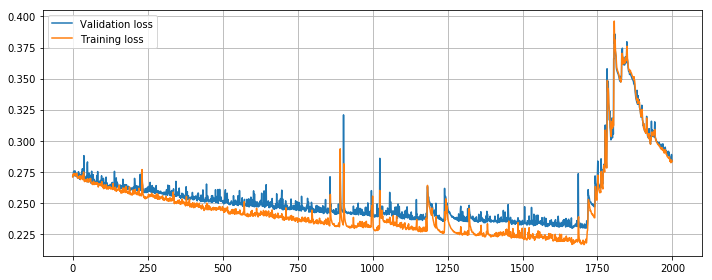

In [15]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

In [16]:
autoencoder.load_weights(weight_path)

In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [20]:
code = encoder.predict([VL_encoded, VH_encoded])

le = LabelEncoder().fit(animals_mask)
labels = le.transform(animals_mask)

unique_labels = np.unique(labels)
len(unique_labels)

25

In [22]:
c=sns.color_palette(n_colors=25)

In [27]:
leg = ax.get_legend()

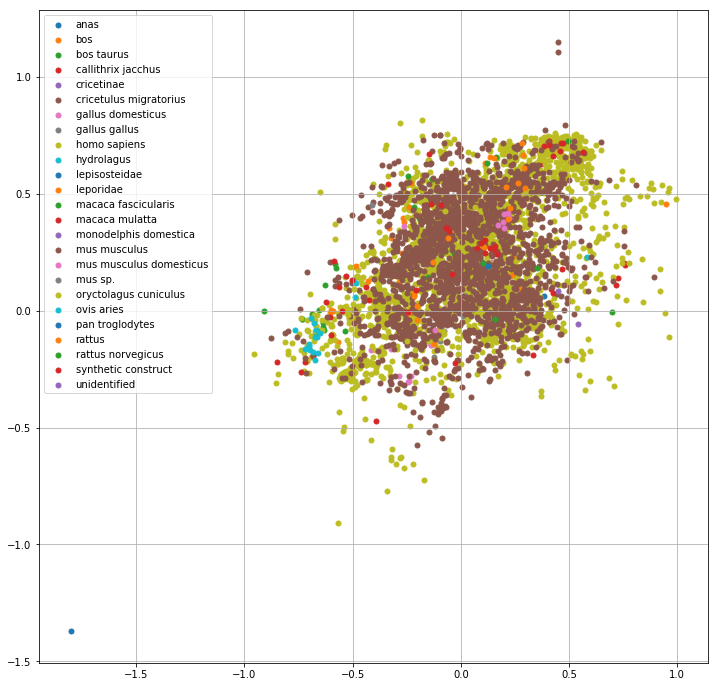

In [45]:
f,ax = plt.subplots(figsize=(12,12))
for x in range(unique_labels.size):
    mask_labels = labels == unique_labels[x]
    ax.scatter(code[mask_labels,0], code[mask_labels,1], marker='.', c=c[x],label=le.classes_[x], s=100)
ax.legend()
leg = ax.get_legend()
for i, x in enumerate(leg.legendHandles):
    x.set_color(c[i])
ax.grid()

In [48]:
from abpytools import FabCollection, ChainCollection
import pandas as pd

combinations = pd.read_csv('/home/gil/PhD/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')

heavy_chains = ChainCollection.load_from_json(path='/home/gil/PhD/UCB/CombinationData/AbFiles/heavy_chains.json')
light_chains = ChainCollection.load_from_json(path='/home/gil/PhD/UCB/CombinationData/AbFiles/light_chains.json')

heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    
    
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

VL_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Light'].values]
VH_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Heavy'].values]

VH_data_encoded = encode_sequences(VH_data, VH_LENGTH, DATASETS)
VL_data_encoded = encode_sequences(VL_data, VL_LENGTH, DATASETS)

VH_data_encoded = ss_VH.transform(VH_data_encoded)
VL_data_encoded = ss_VL.transform(VL_data_encoded)

code_1 = encoder.predict([VL_data_encoded, VH_data_encoded])

latent_data = pd.DataFrame(code_1, columns=[f"Latent{x}" for x in range(1, 21)], index=fab_collection.names)

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data.dropna(axis=0, inplace=True, subset=[data.columns[0]])

data = data.join(latent_data)

data.head()

Loading in antibody objects


/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list


,Tm D - Mean,Tm D - Std. Error,Tm2 - Mean,Tm2 - Std. Error,Latent1,Latent2,Latent3,Latent4,Latent5,Latent6,...,Latent11,Latent12,Latent13,Latent14,Latent15,Latent16,Latent17,Latent18,Latent19,Latent20
P2,64.473820,0.000000,NaN,NaN,0.076197,0.227790,-0.125102,-0.605759,0.232176,1.492411,...,1.272799,-0.317051,0.338004,-0.481103,0.035682,0.214794,0.825115,0.152226,0.245411,-0.286225
P3,73.982970,0.130358,NaN,NaN,0.167129,0.441954,-0.315303,-0.352968,0.298180,1.228398,...,1.817880,-0.409270,0.183751,-0.577717,-0.361081,0.513771,0.801125,-0.232475,0.351871,0.084796
P4,64.326010,0.060344,NaN,NaN,0.439516,0.026467,0.283642,-0.231198,1.820967,1.787809,...,0.959425,1.083177,0.367824,-0.127807,0.479462,0.462437,1.020879,0.813599,0.298224,-0.954567
P6,74.192370,0.036953,NaN,NaN,-0.022453,0.250432,0.236148,0.357081,0.074862,0.716189,...,0.495866,0.256520,0.778920,0.498757,0.484510,0.133678,0.563593,0.889311,-0.179888,0.029501
P9,72.899025,0.085337,NaN,NaN,0.703113,0.233393,0.362119,-0.033094,1.558579,1.505654,...,0.830482,1.283616,0.334512,0.361634,0.826460,0.591104,0.857498,1.044017,-0.147013,-0.594880


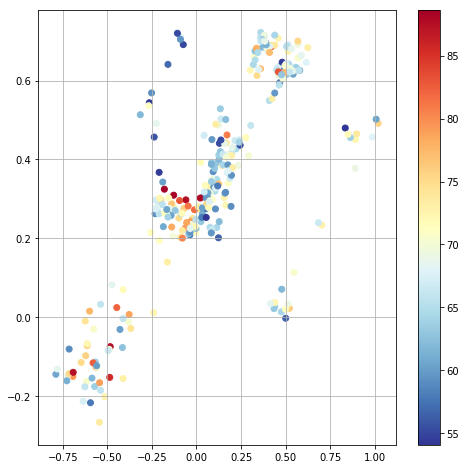

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
plt.colorbar()
plt.grid()

In [50]:
from sklearn.cluster import KMeans

In [54]:
X = data[[x for x in data.columns if 'Latent' in x]].as_matrix()

/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [56]:
norm_variance = [np.var(X[:, x])/abs(np.mean(X[:,x])) for x in range(X.shape[1])]

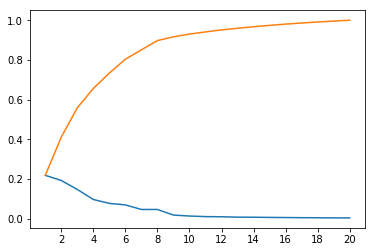

In [57]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=11))

ax.plot(range(1, 21), [norm_variance[x]/sum(norm_variance) for x in np.argsort(norm_variance)[::-1]])
ax.plot(range(1, 21), np.cumsum([norm_variance[x]/sum(norm_variance) for x in np.argsort(norm_variance)[::-1]]))

In [58]:
X=X[:, np.argsort(norm_variance)[::-1]][:, :8]

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

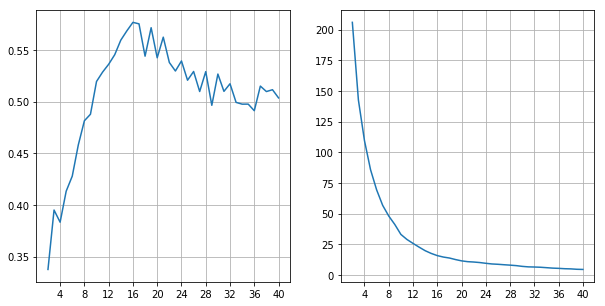

In [61]:
f, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].xaxis.set_major_locator(MaxNLocator(nbins=11))
ax[1].xaxis.set_major_locator(MaxNLocator(nbins=11))

s_scores = []
i_scores = []
for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, random_state=0)
    s_scores.append(silhouette_score(X, kmeans.fit_predict(X)))
    i_scores.append(kmeans.inertia_)
ax[0].plot(range(2, 41), s_scores)
ax[1].plot(range(2, 41), i_scores)
ax[0].grid()
ax[1].grid()

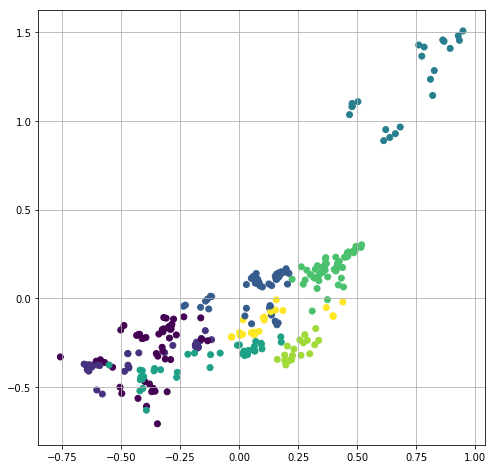

In [66]:
N_CLUSTERS = 8

kmeans = KMeans(N_CLUSTERS, random_state=0)
kmeans.fit(X)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=kmeans.predict(X))
plt.grid()

/home/gil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


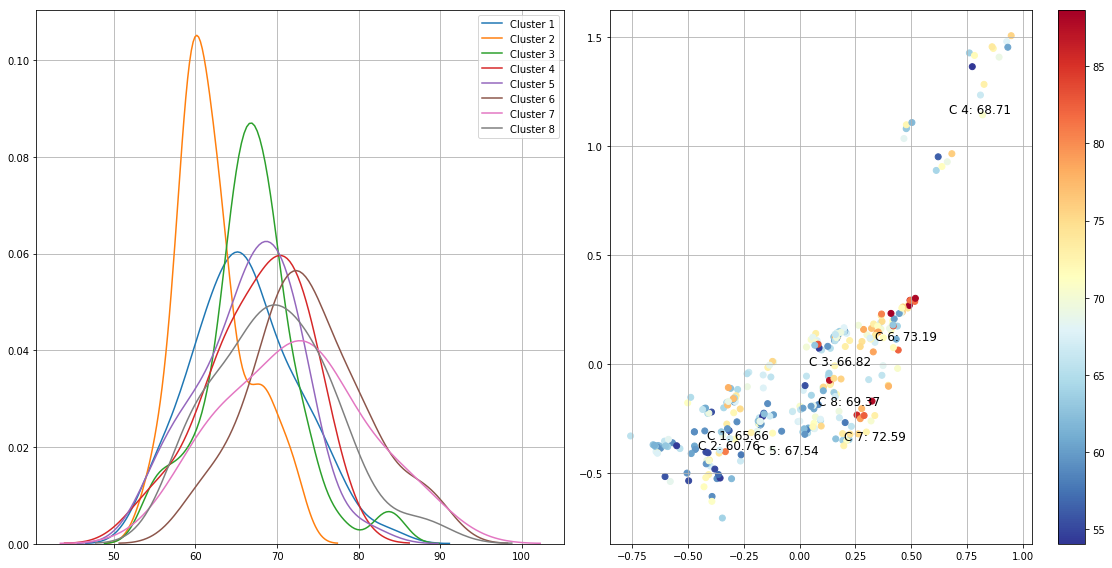

In [65]:
f, ax = plt.subplots(1,2,figsize=(16,8))
kmeans_labels = kmeans.predict(X) 
tms = ax[1].scatter(X[:,0], X[:,1], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
for x in range(N_CLUSTERS):
    ax[1].text(kmeans.cluster_centers_[x][0]-.05, kmeans.cluster_centers_[x][1]-.06,
               'C {}: {:.2f}'.format(x+1, np.median(data.values[kmeans_labels==x, 0])), fontsize=12)
cbar = f.colorbar(tms)
ax[1].grid()
for x in range(N_CLUSTERS):
    sns.distplot(data.values[kmeans_labels==x, 0], ax=ax[0], hist=False, label='Cluster {}'.format(x+1))
ax[0].legend()
ax[0].grid()
#     print(data.values[kmeans_labels==x, 0].mean(), data.values[kmeans_labels==x, 0].std())
plt.tight_layout()

In [67]:
from scipy import stats

In [68]:
ks_data = np.zeros((N_CLUSTERS, N_CLUSTERS))
for i in range(N_CLUSTERS):
    for j in range(N_CLUSTERS):
        ks_data[i,j] = stats.ks_2samp(data.values[kmeans_labels==i, 0], data.values[kmeans_labels==j, 0]).pvalue

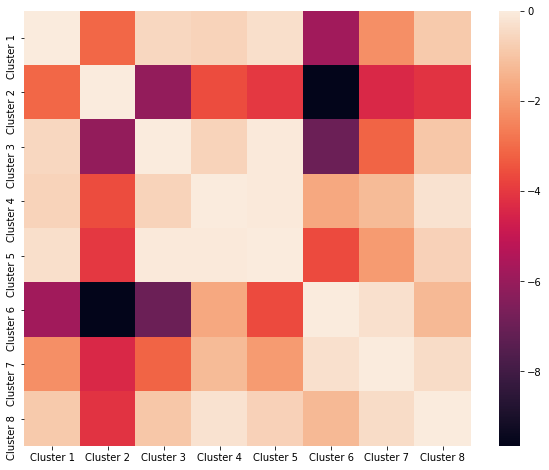

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(np.log10(ks_data), xticklabels=['Cluster {}'.format(x) for x in range(1, N_CLUSTERS+1)],
            yticklabels=['Cluster {}'.format(x) for x in range(1, N_CLUSTERS+1)])

In [70]:
lambda_kappa = fab_collection.germline['Light']['Assignment'].apply(lambda x: 1 if x.startswith('IGL') else 0).values
lambda_kappa = lambda_kappa[[fab_collection.names.index(name) for name in data.index]]

Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list



Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list
Loading in antibody objects


Failed to load 0 objects in list



In [71]:
heavy_germline = fab_collection.germline['Heavy']['Assignment'].apply(lambda x: int(x.split('-')[0][-1])).values
heavy_germline = heavy_germline[[fab_collection.names.index(name) for name in data.index]]

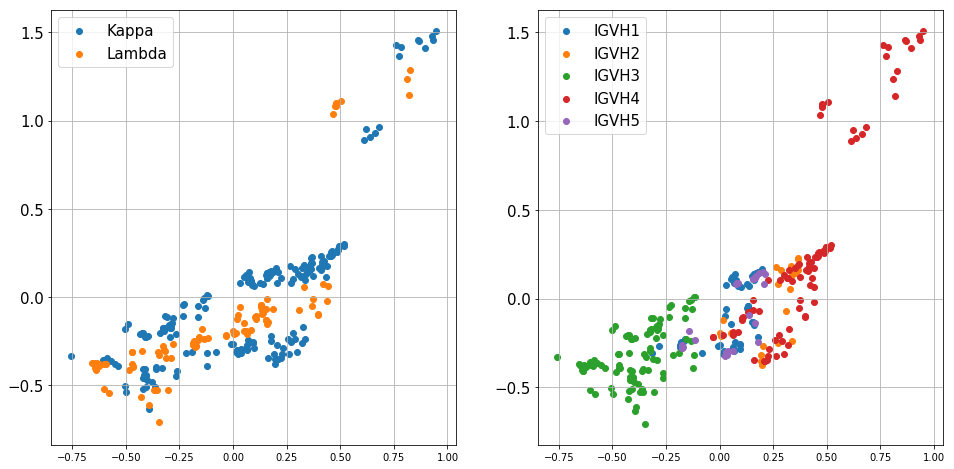

In [73]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 10,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):

    f, ax = plt.subplots(1,2,figsize=(16,8))
    for x in range(2):
        mask_labels = lambda_kappa == x
        if x == 0:
            label = 'Kappa'
        else:
            label = 'Lambda'
        ax[0].scatter(X[:,0][mask_labels], X[:,1][mask_labels], 
                    label=label)
    ax[0].legend()
    ax[0].grid()

    for x in np.unique(heavy_germline):
        mask_labels = heavy_germline == x
        ax[1].scatter(X[:,0][mask_labels], X[:,1][mask_labels], 
                    label='IGVH{}'.format(x))
    ax[1].legend()
    ax[1].grid()

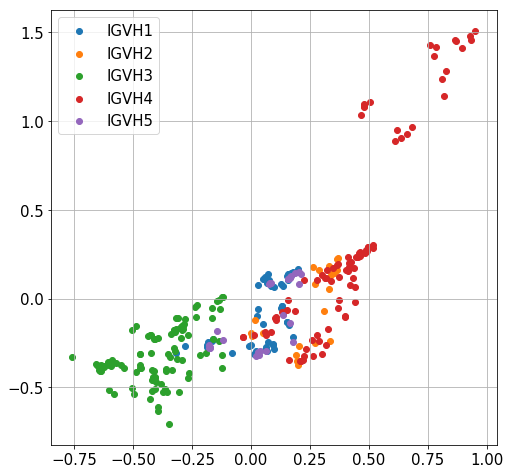

In [75]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":15, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    plt.figure(figsize=(8,8))
    for x in np.unique(heavy_germline):
        mask_labels = heavy_germline == x
        plt.scatter(X[:,0][mask_labels], X[:,1][mask_labels],
                    label='IGVH{}'.format(x))
    plt.legend()
    plt.grid()

In [76]:
silhouette_score(X, heavy_germline)

0.03321123

In [77]:
silhouette_score(X, lambda_kappa)

0.10056024